---
# 투자

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock
from datetime import timedelta

In [65]:
# func 모음

# 1. 종목코드를 6자리로 통일. ex) 990 -> 000990
def padding(x):
    x = str(x)
    return x.rjust(6, "0")

# 2. True, False 반전
def func_not(x):
    return not x

In [ ]:
2012/전략1/cumulativereturn/cagr/sharpe/sortino
2012/전략1/cumulativereturn/cagr/sharpe/sortino
2012/전략1/cumulativereturn/cagr/sharpe/sortino
2012/전략1/cumulativereturn/cagr/sharpe/sortino
2012/전략1/cumulativereturn/cagr/sharpe/sortino
2012/전략1/cumulativereturn/cagr/sharpe/sortino

---
# 비중계산

## 1. 마코위츠 데이터 로드

In [98]:
df=pd.read_excel('./datasets/df_2012.xlsx', index_col=0)
df["거래소코드"] = df["거래소코드"].map(padding)
df

,회계년도,거래소코드
239,2012,023430
240,2012,023430
241,2012,023430
242,2012,023430
243,2012,023430
...,...,...
5496,2012,001780
5497,2012,001780
5498,2012,001780
5499,2012,001780


In [67]:
df=pd.DataFrame(df['거래소코드'].unique())
df.rename(columns={0:'거래소코드'}, inplace=True)
df

,거래소코드
0,023430
1,023410
2,078350
3,080000
4,024890
5,025860
6,052300
7,039740
8,065450
9,031310


## a. volinger

> # 날짜 변경(2012년도데이터면 20120401~20130331)
> 비중계산은 4월부터 3월(아래서 투자할 때는 +1년의 1월부터 +2년의 3월)

In [68]:
n=20
sigma = 2
df_marko=[]

for i in df.index:
    df_market = stock.get_market_ohlcv("20120102", "20130430", df.loc[i,"거래소코드"])
    df_market["거래소코드"] = df.loc[i,"거래소코드"]
    df_market["center"] = df_market['종가'].rolling(n).mean()
    df_market["ub"] = df_market['center'] + sigma*df_market['종가'].rolling(n).std()
    df_market["lb"] = df_market['center'] - sigma*df_market['종가'].rolling(n).std()
    df_marko.append(df_market)

In [69]:
df_marko = pd.concat(df_marko)
df_marko['PB'] = (df_marko['종가'] - df_marko['lb']) / (df_marko['ub'] - df_marko['lb'])
df_marko.reset_index(drop=False, inplace=True)
df_marko=df_marko.pivot(index='날짜', columns='거래소코드', values='종가')
df_marko

거래소코드,001780,004870,004960,006050,009470,023410,023430,024890,025860,031310,036030,039740,052300,065450,078350,080000
날짜,,,,,,,,,,,,,,,,
2012-01-02,2665,3100,8090,1410,4020,4950,513,796,10550,1360,7250,2635,445,1635,3430,10850
2012-01-03,2810,3100,8100,1400,4160,5090,537,770,10550,1355,7200,2605,430,1665,3385,10850
2012-01-04,2870,3100,8150,1475,4125,5140,540,765,10750,1400,7810,2655,425,1655,3385,10750
2012-01-05,2815,3100,8090,1495,4255,5030,514,755,10600,1405,8050,3050,488,1680,3400,10800
2012-01-06,2970,3100,8150,1500,4135,4960,522,749,10200,1325,8180,2870,544,1675,3355,10500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-24,2625,1940,9100,1195,3165,3895,630,2065,7160,1120,11400,4045,935,1985,2645,9150
2013-04-25,2550,1965,8980,1110,3140,3855,631,2180,7110,1130,11550,3700,926,2030,2610,8930
2013-04-26,2565,1915,9000,1115,3165,3670,635,2310,7110,1125,11700,3800,888,2095,2625,9090


## 2. pct change(종목별 일별수익률)

In [70]:
daily_ret = df_marko.pct_change()
daily_ret

거래소코드,001780,004870,004960,006050,009470,023410,023430,024890,025860,031310,036030,039740,052300,065450,078350,080000
날짜,,,,,,,,,,,,,,,,
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,0.054409,0.000000,0.001236,-0.007092,0.034826,0.028283,0.046784,-0.032663,0.000000,-0.003676,-0.006897,-0.011385,-0.033708,0.018349,-0.013120,0.000000
2012-01-04,0.021352,0.000000,0.006173,0.053571,-0.008413,0.009823,0.005587,-0.006494,0.018957,0.033210,0.084722,0.019194,-0.011628,-0.006006,0.000000,-0.009217
2012-01-05,-0.019164,0.000000,-0.007362,0.013559,0.031515,-0.021401,-0.048148,-0.013072,-0.013953,0.003571,0.030730,0.148776,0.148235,0.015106,0.004431,0.004651
2012-01-06,0.055062,0.000000,0.007417,0.003344,-0.028202,-0.013917,0.015564,-0.007947,-0.037736,-0.056940,0.016149,-0.059016,0.114754,-0.002976,-0.013235,-0.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-24,0.039604,0.005181,0.006637,0.043668,0.017685,0.029062,0.003185,0.007317,0.034682,-0.008850,-0.004367,0.022756,0.001071,-0.043373,0.019268,0.005495
2013-04-25,-0.028571,0.012887,-0.013187,-0.071130,-0.007899,-0.010270,0.001587,0.055690,-0.006983,0.008929,0.013158,-0.085290,-0.009626,0.022670,-0.013233,-0.024044
2013-04-26,0.005882,-0.025445,0.002227,0.004505,0.007962,-0.047990,0.006339,0.059633,0.000000,-0.004425,0.012987,0.027027,-0.041037,0.032020,0.005747,0.017917


## 3. annuar_ret(일별수익률의 공분산)

In [71]:
annual_ret = daily_ret.mean()*252 # 연간 수익률(아래 비중 계산에 사용됨)
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252
annual_cov

거래소코드,001780,004870,004960,006050,009470,023410,023430,024890,025860,031310,036030,039740,052300,065450,078350,080000
거래소코드,,,,,,,,,,,,,,,,
001780,0.124980,0.005789,0.005107,0.045259,0.017148,0.031315,0.013659,-0.006265,0.012530,0.030055,0.024978,0.029672,0.033839,0.018424,0.019192,0.037386
004870,0.005789,0.462129,0.001763,-0.003532,0.009969,-0.045780,0.014556,0.024734,-0.000959,0.000960,0.015955,0.027290,0.006629,-0.056355,-0.007319,0.013443
004960,0.005107,0.001763,0.099603,0.004940,0.011272,0.013612,0.003727,0.006278,0.004834,0.008746,0.006177,0.018395,0.008059,0.023241,0.024058,0.017015
006050,0.045259,-0.003532,0.004940,0.469069,0.039842,0.042002,-0.011958,0.003601,0.021554,0.049997,0.024913,0.163662,-0.002235,0.032200,0.031027,0.075550
009470,0.017148,0.009969,0.011272,0.039842,0.119093,0.034819,0.000315,0.006082,0.019536,0.028973,0.025445,0.028396,0.018755,-0.009059,0.034962,0.016056
023410,0.031315,-0.045780,0.013612,0.042002,0.034819,0.327910,0.033346,0.037485,0.021768,0.033039,0.036293,0.070278,-0.034257,0.000676,0.033305,0.058868
023430,0.013659,0.014556,0.003727,-0.011958,0.000315,0.033346,0.268961,0.017233,0.005450,0.021319,0.012655,-0.019974,0.013880,0.007317,0.033367,0.020206
024890,-0.006265,0.024734,0.006278,0.003601,0.006082,0.037485,0.017233,0.309596,0.029243,0.002327,0.024851,-0.021143,-0.024430,-0.020969,0.028780,0.022831
025860,0.012530,-0.000959,0.004834,0.021554,0.019536,0.021768,0.005450,0.029243,0.103952,-0.000706,0.017534,0.003064,0.029915,-0.028509,0.023868,0.024490


In [72]:
list_stocks=annual_cov.columns.tolist()
port_ret = []
port_risk = []
port_weights = []
sharpe_ratio = [] 

## 4. 몬테까를로 시뮬레이션 20000개 시나리오 

In [73]:
#몬테까를로 시뮬레이션 20000개 시나리오 
for _ in range(20000): 
    weights = np.random.random(len(list_stocks))  # 랜덤숫자 4개
    weights /= np.sum(weights)  # 4개의 랜덤 숫자를 랜덤 숫자의 총합으로 나눠서, 4 종목 비중의 합이 1

    returns = np.dot(weights, annual_ret) # 비중 * 연간 수익율 --> 포트 수익률
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))  # 종목별 연간 공분산과 종목별 비중 배열 곱하고, 이를 다시 종목 별 비중 전치로 곱함. 이걸 제곱근. 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk) 

portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(list_stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in list_stocks]]  

In [74]:
df

,Returns,Risk,Sharpe,001780,004870,004960,006050,009470,023410,023430,024890,025860,031310,036030,039740,052300,065450,078350,080000
0,0.182800,0.206662,0.884539,0.085878,0.069145,0.029281,0.034141,0.098946,0.065809,0.084653,0.074643,0.068280,0.102233,0.012175,0.090091,0.029845,0.044714,0.035244,0.074923
1,0.234274,0.228095,1.027091,0.007287,0.102656,0.014862,0.040304,0.017585,0.041412,0.022955,0.018246,0.084430,0.096401,0.102305,0.092457,0.106037,0.100890,0.074065,0.078109
2,0.089048,0.214387,0.415360,0.024809,0.068521,0.084212,0.125245,0.042244,0.105462,0.121845,0.001090,0.103513,0.044779,0.026579,0.034707,0.036524,0.023459,0.043795,0.113215
3,0.333826,0.252904,1.319972,0.006316,0.001169,0.153930,0.025725,0.022196,0.082345,0.002962,0.140478,0.028717,0.113865,0.026990,0.131464,0.087574,0.010412,0.008730,0.157127
4,0.211121,0.199598,1.057734,0.052310,0.056603,0.099771,0.098760,0.096361,0.096335,0.102661,0.044516,0.004951,0.056017,0.056841,0.032366,0.098688,0.039472,0.043532,0.020815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.256028,0.220062,1.163433,0.101990,0.063445,0.069047,0.099345,0.080607,0.082058,0.032364,0.080585,0.059718,0.002397,0.038215,0.100381,0.086142,0.057283,0.008345,0.038078
19996,0.213521,0.212693,1.003893,0.028735,0.098650,0.036970,0.017333,0.044058,0.078935,0.087533,0.033023,0.054391,0.002343,0.131499,0.055572,0.041739,0.117647,0.044925,0.126648
19997,0.211947,0.248668,0.852330,0.036765,0.021838,0.087173,0.130882,0.077301,0.087457,0.012861,0.022370,0.064799,0.033004,0.032222,0.112542,0.060027,0.123709,0.077429,0.019622
19998,0.196155,0.203931,0.961867,0.055866,0.027270,0.102522,0.053365,0.064917,0.086552,0.111832,0.052716,0.030489,0.089685,0.035638,0.071688,0.038802,0.049536,0.096418,0.032703


In [75]:
# 리스크가 같을 때 수익률을 높게 : 아래 별모양
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]
max_sharpe

,Returns,Risk,Sharpe,001780,004870,004960,006050,009470,023410,023430,024890,025860,031310,036030,039740,052300,065450,078350,080000
9010,0.402644,0.217761,1.849019,0.04605,0.088402,0.016814,0.040949,0.035306,0.015955,0.126601,0.143589,0.018672,0.014185,0.13821,0.04037,0.125363,0.113377,0.02787,0.008285


In [76]:
list_code = list(max_sharpe.columns)
list_percen = list(max_sharpe.iloc[0])
dict_weight_max = dict(zip(list_code, list_percen))
print(dict_weight_max)

{'Returns': 0.40264436884085986, 'Risk': 0.2177610204244008, 'Sharpe': 1.8490194804200244, '001780': 0.04605016341705686, '004870': 0.08840153626400103, '004960': 0.01681433560190579, '006050': 0.04094898801854322, '009470': 0.035306253984946155, '023410': 0.01595532293985037, '023430': 0.12660125300026495, '024890': 0.14358891818502006, '025860': 0.018672021196102822, '031310': 0.014185061391068248, '036030': 0.13821022608193753, '039740': 0.040370065210968364, '052300': 0.12536324621490152, '065450': 0.11337684728846222, '078350': 0.027870403518266286, '080000': 0.0082853576867045}


In [77]:
# 수익률이 같을 때 리스크를 낮게 : 아래 x모양
min_risk = df.loc[df['Risk'] == df['Risk'].min()] 
min_risk

,Returns,Risk,Sharpe,001780,004870,004960,006050,009470,023410,023430,024890,025860,031310,036030,039740,052300,065450,078350,080000
14409,0.129595,0.174644,0.742053,0.125329,0.051323,0.147273,0.025462,0.016794,0.065625,0.096226,0.035296,0.146102,0.02183,0.148183,0.000763,0.022686,0.030422,0.029912,0.036775


In [78]:
list_code = list(min_risk.columns)
list_percen = list(min_risk.iloc[0])
dict_weight_min = dict(zip(list_code, list_percen))
print(dict_weight_min)

{'Returns': 0.12959523593210598, 'Risk': 0.17464407056725792, 'Sharpe': 0.7420534548420126, '001780': 0.12532877152956445, '004870': 0.051323170795878066, '004960': 0.147273084422772, '006050': 0.025462413716561577, '009470': 0.016794222332112942, '023410': 0.06562475838659594, '023430': 0.09622610240505369, '024890': 0.035295989884493166, '025860': 0.14610167042760755, '031310': 0.02182964223020062, '036030': 0.14818316819250502, '039740': 0.0007631241737697225, '052300': 0.02268580548594999, '065450': 0.030421755941168725, '078350': 0.029911753744136692, '080000': 0.03677456633162967}


## 5. 몬테까를로 시각화

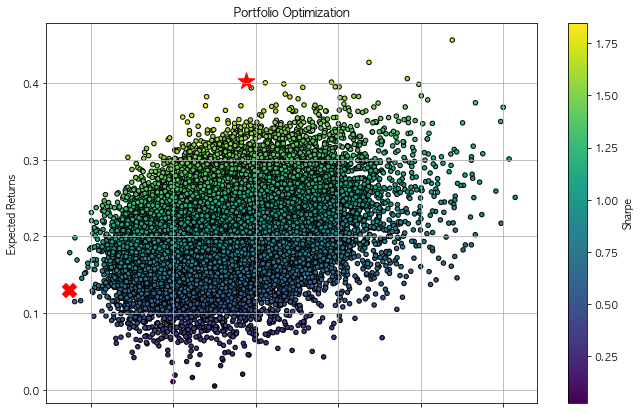

In [79]:
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis', edgecolors='k', figsize=(11,7), grid=True)  
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r', marker='*', s=300) 
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', marker='X', s=200)  
plt.title('Portfolio Optimization') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show()

---
# 전략

## 1. 볼린저밴드와 MFI를 활용한 추세 추종 매매

추세 추종 : 상승 추세에 매수, 하락 추세에 매도
현금흐름지표 MFI나 일중강도 같은 거래량 관련 지표를 함께 활용

매수 : 주가 상단 밴드에 접근하며, 지표가 강세를 확증할 때만 매수 (%b가 0.8보다 크고, MFI가 80보다 클 때)
매도 : 주가 하단 밴드에 접근하며, 지표가 약세를 확증할 때만 매도 (%b가 0.2보다 작고, MFI가 20보다 작을 때)

%b : 주가가 볼린저 밴드 어디에 위치하는지 
     (종가 - 하단 볼린저 밴드) / (상단 볼린저 밴드 - 하단 볼린저 밴드)

MFI : 중심가격 TP (고가, 저가, 종가 합을 3으로 나눔) 
     TP * 거래량 = 현금흐름  --> 이것을 중심가격이 전일 대비 상승한 날은 '긍정적 현금흐름 합'
                                                   하락한 날은 '부정적 현금흐름 합'



## 2. 볼린저 밴드와 일중 강도를 활용한 반전 매매

### a.볼린저밴드

- 주가가 반점하는 지점을 찾아서 매수 또는 매도
- 매수 : 주가가 하단 밴드 부근에서 W(쌍바닥) 패턴을 나타내고, 강세 지표가 확증 할 때 매수 (%b가 0.05보다 작고, II% 가 0보다 크면 매수)
- 매도 : 주가가 상단 밴드 부근에서 주가 태그, 약세 지표가 확증 할 때 매수 (%b가 0.95보다 크고, II% 가 0보다 작으면 매수)

---
# Preprocessing 

## 0. Data

In [80]:
df_2012=pd.read_excel('./datasets/df_2012.xlsx', index_col=0)
df_2012["거래소코드"] = df_2012["거래소코드"].map(padding)
df_2012

,회계년도,거래소코드
239,2012,023430
240,2012,023430
241,2012,023430
242,2012,023430
243,2012,023430
...,...,...
5496,2012,001780
5497,2012,001780
5498,2012,001780
5499,2012,001780


In [81]:
df_2012=pd.DataFrame(df_2012['거래소코드'].unique())
df_2012.rename(columns={0:'거래소코드'}, inplace=True)
df_2012

,거래소코드
0,023430
1,023410
2,078350
3,080000
4,024890
5,025860
6,052300
7,039740
8,065450
9,031310


## 1. volinger

> # 날짜 변경(2012년도데이터면 20130101~20140331)

In [ ]:
n=20
sigma = 2
df_invest=[]

for i in df_2012.index:
    df_market = stock.get_market_ohlcv("20130101", "20140331", df_2012.loc[i,"거래소코드"]) # 연도마다 날짜 설정
    df_market["거래소코드"] = df_2012.loc[i,"거래소코드"]
    df_market["center"] = df_market['종가'].rolling(n).mean()
    df_market["ub"] = df_market['center'] + sigma*df_market['종가'].rolling(n).std()
    df_market["lb"] = df_market['center'] - sigma*df_market['종가'].rolling(n).std()
    df_invest.append(df_market)

In [83]:
df_invest = pd.concat(df_invest)
df_invest['PB'] = (df_invest['종가'] - df_invest['lb']) / (df_invest['ub'] - df_invest['lb'])
df_invest['PB'] = df_invest['PB'].fillna(0.5) # 상한선 하한선이 같아서 PB(바닥부터의 위치)를 중간인 0.5로 설정
df_invest

,시가,고가,저가,종가,거래량,거래대금,등락률,거래소코드,center,ub,lb,PB
날짜,,,,,,,,,,,,
2012-01-02,511,529,506,513,138646,70950871,-3.21,023430,NaN,NaN,NaN,0.500000
2012-01-03,549,549,503,537,77360,39854151,4.68,023430,NaN,NaN,NaN,0.500000
2012-01-04,509,540,509,540,49932,26022983,0.56,023430,NaN,NaN,NaN,0.500000
2012-01-05,569,569,514,514,88720,46462630,-4.81,023430,NaN,NaN,NaN,0.500000
2012-01-06,514,535,500,522,92141,47122221,1.56,023430,NaN,NaN,NaN,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-24,2525,2630,2525,2625,139714,362766780,3.96,001780,2543.00,2716.247617,2369.752383,0.736655
2013-04-25,2630,2660,2540,2550,171302,440377400,-2.86,001780,2553.75,2696.684472,2410.815528,0.486882
2013-04-26,2550,2575,2535,2565,98578,252099970,0.59,001780,2564.25,2672.308220,2456.191780,0.503470


## 2. MFI (Money Flow Index)

In [84]:
df_invest.rename(columns={'고가':'high'},inplace = True)
df_invest.rename(columns={'저가':'low'},inplace = True)
df_invest.rename(columns={'종가':'close'},inplace = True)
df_invest.rename(columns={'거래량':'volume'},inplace = True)

In [85]:
df_invest['TP'] = (df_invest['high'] + df_invest['low'] + df_invest['close']) / 3
df_invest["PMF"] = 0
df_invest["NMF"] = 0

In [86]:
for i in range(len(df_invest.close)-1):
    if df_invest.TP.values[i] < df_invest.TP.values[i+1]:
        df_invest.PMF.values[i+1] = df_invest.TP.values[i+1] * df_invest.volume.values[i+1]
        df_invest.NMF.values[i+1] = 0
    else:
        df_invest.NMF.values[i+1] = df_invest.TP.values[i+1] * df_invest.volume.values[i+1]
        df_invest.PMF.values[i+1] = 0

In [87]:
df_invest['MFR'] = (df_invest.PMF.rolling(window=10).sum() / df_invest.NMF.rolling(window=10).sum())
df_invest['MFR'] = df_invest['MFR'].fillna(0) # PMF, NMF가 0이면 NaN임(거래정지일 때)
df_invest['MFI10'] = 100 - 100/(1 + df_invest['MFR'])
df_invest.head(10)

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,lb,PB,TP,PMF,NMF,MFR,MFI10
날짜,,,,,,,,,,,,,,,,,
2012-01-02,511,529,506,513,138646,70950871,-3.21,023430,NaN,NaN,NaN,0.5,516.000000,0,0,0.0000,0.000000
2012-01-03,549,549,503,537,77360,39854151,4.68,023430,NaN,NaN,NaN,0.5,529.666667,40975013,0,0.0000,0.000000
2012-01-04,509,540,509,540,49932,26022983,0.56,023430,NaN,NaN,NaN,0.5,529.666667,0,26447315,0.0000,0.000000
2012-01-05,569,569,514,514,88720,46462630,-4.81,023430,NaN,NaN,NaN,0.5,532.333333,47228613,0,0.0000,0.000000
2012-01-06,514,535,500,522,92141,47122221,1.56,023430,NaN,NaN,NaN,0.5,519.000000,0,47821179,0.0000,0.000000
2012-01-09,522,535,511,520,69318,36616570,-0.38,023430,NaN,NaN,NaN,0.5,522.000000,36183996,0,0.0000,0.000000
2012-01-10,535,535,509,516,43649,22438853,-0.77,023430,NaN,NaN,NaN,0.5,520.000000,0,22697480,0.0000,0.000000
2012-01-11,516,520,500,515,40150,20329599,-0.19,023430,NaN,NaN,NaN,0.5,511.666667,0,20543416,0.0000,0.000000
2012-01-12,515,545,506,515,30772,15728904,0.00,023430,NaN,NaN,NaN,0.5,522.000000,16062984,0,0.0000,0.000000


## 3. 일중 강도

In [88]:
df_invest['II'] = (2*df_invest['close']-df_invest['high']-df_invest['low'])/(df_invest['high']-df_invest['low'])*df_invest['volume']
df_invest['II'] = df_invest['II'].fillna(0) # 상한가 또는 하한가일 때 가격이 고정되어서 분모, 분자가 0이된다.
df_invest['IIP21'] = df_invest['II'].rolling(window=21).sum()/df_invest['volume'].rolling(window=21).sum()*100
# df_invest = df_invest.dropna()
df_invest.head(20)

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,lb,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21
날짜,,,,,,,,,,,,,,,,,,,
2012-01-02,511,529,506,513,138646,70950871,-3.21,023430,NaN,NaN,NaN,0.50000,516.000000,0,0,0.000000,0.000000,-5.425278e+04,NaN
2012-01-03,549,549,503,537,77360,39854151,4.68,023430,NaN,NaN,NaN,0.50000,529.666667,40975013,0,0.000000,0.000000,3.699826e+04,NaN
2012-01-04,509,540,509,540,49932,26022983,0.56,023430,NaN,NaN,NaN,0.50000,529.666667,0,26447315,0.000000,0.000000,4.993200e+04,NaN
2012-01-05,569,569,514,514,88720,46462630,-4.81,023430,NaN,NaN,NaN,0.50000,532.333333,47228613,0,0.000000,0.000000,-8.872000e+04,NaN
2012-01-06,514,535,500,522,92141,47122221,1.56,023430,NaN,NaN,NaN,0.50000,519.000000,0,47821179,0.000000,0.000000,2.369340e+04,NaN
2012-01-09,522,535,511,520,69318,36616570,-0.38,023430,NaN,NaN,NaN,0.50000,522.000000,36183996,0,0.000000,0.000000,-1.732950e+04,NaN
2012-01-10,535,535,509,516,43649,22438853,-0.77,023430,NaN,NaN,NaN,0.50000,520.000000,0,22697480,0.000000,0.000000,-2.014569e+04,NaN
2012-01-11,516,520,500,515,40150,20329599,-0.19,023430,NaN,NaN,NaN,0.50000,511.666667,0,20543416,0.000000,0.000000,2.007500e+04,NaN
2012-01-12,515,545,506,515,30772,15728904,0.00,023430,NaN,NaN,NaN,0.50000,522.000000,16062984,0,0.000000,0.000000,-1.656954e+04,NaN


In [89]:
# PB가 0.05 이하면서, IIP21이 0 이상이면 매수
# PB가 0.95 이하면서, IIP21이 0 이하이면 매수

# for i in range(0, len(df.close)):
#     if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
#     elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:

## 4. MACD

In [90]:
macd_short, macd_long, macd_signal=12,26,9
df_invest["MACD_short"]=df_invest["close"].rolling(macd_short).mean()
df_invest["MACD_long"]=df_invest["close"].rolling(macd_long).mean()
df_invest["MACD"]=df_invest.apply(lambda x: (x["MACD_short"]-x["MACD_long"]), axis=1)
df_invest["MACD_signal"]=df_invest["MACD"].rolling(macd_signal).mean()  
# df_invest["MACD_sign"]=df_invest.apply(lambda x: ("매수" if x["MACD"]>x["MACD_signal"] else "매도"), axis=1)
df_invest.head(10)

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,...,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MACD_signal
날짜,,,,,,,,,,,,,,,,,,,,,
2012-01-02,511,529,506,513,138646,70950871,-3.21,023430,NaN,NaN,...,0,0,0.0000,0.000000,-5.425278e+04,NaN,NaN,NaN,NaN,NaN
2012-01-03,549,549,503,537,77360,39854151,4.68,023430,NaN,NaN,...,40975013,0,0.0000,0.000000,3.699826e+04,NaN,NaN,NaN,NaN,NaN
2012-01-04,509,540,509,540,49932,26022983,0.56,023430,NaN,NaN,...,0,26447315,0.0000,0.000000,4.993200e+04,NaN,NaN,NaN,NaN,NaN
2012-01-05,569,569,514,514,88720,46462630,-4.81,023430,NaN,NaN,...,47228613,0,0.0000,0.000000,-8.872000e+04,NaN,NaN,NaN,NaN,NaN
2012-01-06,514,535,500,522,92141,47122221,1.56,023430,NaN,NaN,...,0,47821179,0.0000,0.000000,2.369340e+04,NaN,NaN,NaN,NaN,NaN
2012-01-09,522,535,511,520,69318,36616570,-0.38,023430,NaN,NaN,...,36183996,0,0.0000,0.000000,-1.732950e+04,NaN,NaN,NaN,NaN,NaN
2012-01-10,535,535,509,516,43649,22438853,-0.77,023430,NaN,NaN,...,0,22697480,0.0000,0.000000,-2.014569e+04,NaN,NaN,NaN,NaN,NaN
2012-01-11,516,520,500,515,40150,20329599,-0.19,023430,NaN,NaN,...,0,20543416,0.0000,0.000000,2.007500e+04,NaN,NaN,NaN,NaN,NaN
2012-01-12,515,545,506,515,30772,15728904,0.00,023430,NaN,NaN,...,16062984,0,0.0000,0.000000,-1.656954e+04,NaN,NaN,NaN,NaN,NaN


## 5. 이평선

In [91]:
df_invest['MA9'] = df_invest['close'].rolling(9).mean()
df_invest['MA20'] = df_invest['close'].rolling(20).mean()
df_invest['MA40'] = df_invest['close'].rolling(40).mean()
df_invest['MA60'] = df_invest['close'].rolling(60).mean()

# pd.set_option('display.max_columns', None)
# df_invest.drop(columns='MACD_signal', inplace=True)
df_invest.reset_index(drop=False, inplace=True)
df_invest

,날짜,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,...,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA40,MA60
0,2012-01-02,511,529,506,513,138646,70950871,-3.21,023430,NaN,...,0.000000,-54252.782609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-03,549,549,503,537,77360,39854151,4.68,023430,NaN,...,0.000000,36998.260870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-04,509,540,509,540,49932,26022983,0.56,023430,NaN,...,0.000000,49932.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-05,569,569,514,514,88720,46462630,-4.81,023430,NaN,...,0.000000,-88720.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-06,514,535,500,522,92141,47122221,1.56,023430,NaN,...,0.000000,23693.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5291,2013-04-24,2525,2630,2525,2625,139714,362766780,3.96,001780,2543.00,...,46.662853,126407.904762,7.059223,2563.333333,2469.230769,94.102564,2572.222222,2543.00,2346.500,2235.000000
5292,2013-04-25,2630,2660,2540,2550,171302,440377400,-2.86,001780,2553.75,...,36.138947,-142751.666667,2.810301,2567.500000,2487.500000,80.000000,2568.888889,2553.75,2356.000,2244.000000
5293,2013-04-26,2550,2575,2535,2565,98578,252099970,0.59,001780,2564.25,...,37.639444,49289.000000,3.900536,2569.166667,2506.153846,63.012821,2560.555556,2564.25,2365.875,2253.416667
5294,2013-04-29,2610,2620,2570,2600,118334,306962700,1.36,001780,2569.25,...,33.539000,23666.800000,4.146896,2572.083333,2520.769231,51.314103,2558.333333,2569.25,2377.375,2263.666667


## 6. 마지막 : 사용하는 날짜만 필터링(04/01~03/31)

In [92]:
df_2012 = df_invest[df_invest['날짜'] >= '2012-04-01']
df_2012.set_index('날짜', inplace=True)
df_2012

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,...,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA40,MA60
날짜,,,,,,,,,,,,,,,,,,,,,
2012-04-02,684,690,650,674,388590,258935068,-1.46,023430,627.80,718.659290,...,83.213332,77718.000000,1.093781,651.000000,620.884615,30.115385,664.000000,627.80,619.975,595.216667
2012-04-03,704,704,630,658,363706,235863988,-2.37,023430,627.95,719.008050,...,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,622.425,597.616667
2012-04-04,638,673,622,654,282173,179832816,-0.61,023430,629.55,721.289850,...,70.185435,71926.450980,-11.942981,659.000000,624.461538,34.538462,672.444444,629.55,624.775,599.816667
2012-04-05,650,670,623,640,252864,159818568,-2.14,023430,631.75,722.203536,...,70.020432,-69941.106383,20.817186,660.666667,626.038462,34.628205,674.111111,631.75,626.525,601.816667
2012-04-06,640,660,620,640,270468,170299356,0.00,023430,635.75,719.684498,...,65.095480,0.000000,29.930879,662.416667,627.500000,34.916667,668.888889,635.75,628.475,603.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-24,2525,2630,2525,2625,139714,362766780,3.96,001780,2543.00,2716.247617,...,46.662853,126407.904762,7.059223,2563.333333,2469.230769,94.102564,2572.222222,2543.00,2346.500,2235.000000
2013-04-25,2630,2660,2540,2550,171302,440377400,-2.86,001780,2553.75,2696.684472,...,36.138947,-142751.666667,2.810301,2567.500000,2487.500000,80.000000,2568.888889,2553.75,2356.000,2244.000000
2013-04-26,2550,2575,2535,2565,98578,252099970,0.59,001780,2564.25,2672.308220,...,37.639444,49289.000000,3.900536,2569.166667,2506.153846,63.012821,2560.555556,2564.25,2365.875,2253.416667


In [93]:
# df_2012[df_2012.isna().any(axis=1)]
df_2012.isna().sum()

시가            0
high          0
low           0
close         0
volume        0
거래대금          0
등락률           0
거래소코드         0
center        0
ub            0
lb            0
PB            0
TP            0
PMF           0
NMF           0
MFR           0
MFI10         0
II            0
IIP21         0
MACD_short    0
MACD_long     0
MACD          0
MA9           0
MA20          0
MA40          0
MA60          0
dtype: int64

---
# 전략1 : Buy&Hold 전략

## 2) 포트폴리오 일별 수익률 계산(비중 3개 중 택 1)

In [94]:
df_port = df_2012.copy()
df_port

,시가,high,low,close,volume,거래대금,등락률,거래소코드,center,ub,...,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA40,MA60
날짜,,,,,,,,,,,,,,,,,,,,,
2012-04-02,684,690,650,674,388590,258935068,-1.46,023430,627.80,718.659290,...,83.213332,77718.000000,1.093781,651.000000,620.884615,30.115385,664.000000,627.80,619.975,595.216667
2012-04-03,704,704,630,658,363706,235863988,-2.37,023430,627.95,719.008050,...,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,622.425,597.616667
2012-04-04,638,673,622,654,282173,179832816,-0.61,023430,629.55,721.289850,...,70.185435,71926.450980,-11.942981,659.000000,624.461538,34.538462,672.444444,629.55,624.775,599.816667
2012-04-05,650,670,623,640,252864,159818568,-2.14,023430,631.75,722.203536,...,70.020432,-69941.106383,20.817186,660.666667,626.038462,34.628205,674.111111,631.75,626.525,601.816667
2012-04-06,640,660,620,640,270468,170299356,0.00,023430,635.75,719.684498,...,65.095480,0.000000,29.930879,662.416667,627.500000,34.916667,668.888889,635.75,628.475,603.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-24,2525,2630,2525,2625,139714,362766780,3.96,001780,2543.00,2716.247617,...,46.662853,126407.904762,7.059223,2563.333333,2469.230769,94.102564,2572.222222,2543.00,2346.500,2235.000000
2013-04-25,2630,2660,2540,2550,171302,440377400,-2.86,001780,2553.75,2696.684472,...,36.138947,-142751.666667,2.810301,2567.500000,2487.500000,80.000000,2568.888889,2553.75,2356.000,2244.000000
2013-04-26,2550,2575,2535,2565,98578,252099970,0.59,001780,2564.25,2672.308220,...,37.639444,49289.000000,3.900536,2569.166667,2506.153846,63.012821,2560.555556,2564.25,2365.875,2253.416667


### 1. 동등비중

In [37]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = df_acompany["close"].pct_change()
#     port_return += df_stock
# port_return = port_return/len(list_company_code)

### 2. 수익률 높게

In [95]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = df_acompany["close"].pct_change()
    port_return += df_stock * dict_weight_max[i] # 리스크가 같을 때 수익률 젤 높게하는 비중으로 가중평균
port_return = port_return/len(list_company_code)

### 3. 리스크 낮게

In [ ]:
# list_company_code = list(df_port["거래소코드"].unique())

# port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
# for i in list_company_code:
#     df_acompany = df_port[df_port["거래소코드"]==i]
#     df_stock = df_acompany["close"].pct_change()
#     port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
# port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2012-04-02
End Period          2013-04-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   2.47%
CAGR﹪              2.29%

Sharpe              1.67
Prob. Sharpe Ratio  95.33%
Sortino             2.41
Sortino/√2          1.71
Omega               1.33

Max Drawdown        -1.27%
Longest DD Days     147

Gain/Pain Ratio     0.33
Gain/Pain (1M)      2.25

Payoff Ratio        1.01
Profit Factor       1.33
Common Sense Ratio  1.38
CPC Index           0.76
Tail Ratio          1.04
Outlier Win Ratio   2.85
Outlier Loss Ratio  3.61

MTD                 0.35%
3M                  0.75%
6M                  1.04%
YTD                 1.63%
1Y                  2.15%
3Y (ann.)           2.29%
5Y (ann.)           2.29%
10Y (ann.)          2.29%
All-time (ann.)     2.29%

Avg. Drawdown       -0.23%
Avg. Drawdown Days  17
Recovery Factor     1.95
Ulcer Index         0.0
Serenity Index      0.48


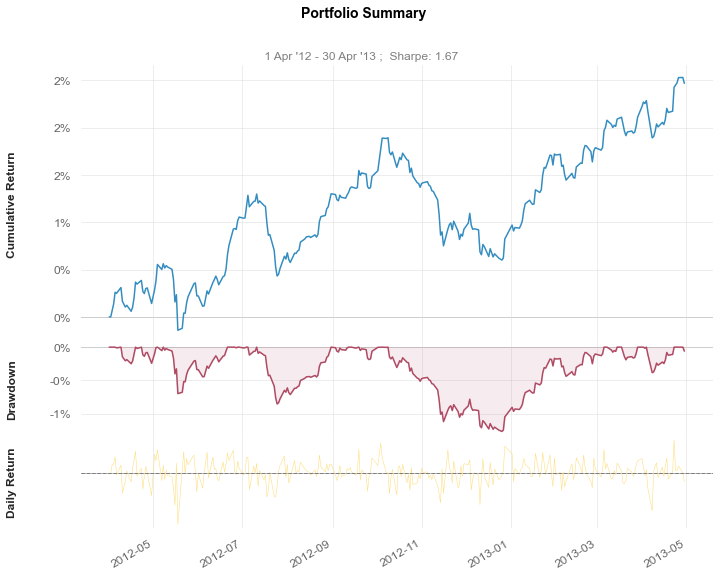

In [96]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

---
# 전략2 : PB&MFI 전략

## 1) 전략2 함수 : 일별수익률로 return

In [329]:
def func_strategy2(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "PB"] >= 0.8)&(df_func.loc[i, "MFI10"] >= 80)):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if (df_func.loc[i, "PB"] >= 0.8)&(df_func.loc[i, "MFI10"] >= 80):
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if (df_func.loc[i, "PB"] <= 0.5): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock

## 2) 포트폴리오 일별 수익률 계산

In [330]:
df_port = df_2012.copy()

In [331]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = func_strategy2(df_acompany)
    port_return += df_stock
port_return = port_return/len(list_company_code)

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_44375/3801652455.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["BS"] = ""
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_44375/3801652455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_func["보유날_종가"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_44375/3801652455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2012-04-02
End Period          2013-04-30
Risk-Free Rate      0.0%
Time in Market      86.0%

Cumulative Return   30.27%
CAGR﹪              27.84%

Sharpe              3.1
Prob. Sharpe Ratio  99.96%
Sortino             5.69
Sortino/√2          4.02
Omega               1.77

Max Drawdown        -3.0%
Longest DD Days     65

Gain/Pain Ratio     0.77
Gain/Pain (1M)      9.37

Payoff Ratio        1.28
Profit Factor       1.77
Common Sense Ratio  2.6
CPC Index           1.32
Tail Ratio          1.47
Outlier Win Ratio   4.44
Outlier Loss Ratio  2.77

MTD                 1.11%
3M                  8.24%
6M                  14.59%
YTD                 15.45%
1Y                  22.8%
3Y (ann.)           27.84%
5Y (ann.)           27.84%
10Y (ann.)          27.84%
All-time (ann.)     27.84%

Avg. Drawdown       -1.05%
Avg. Drawdown Days  13
Recovery Factor     10.08
Ulcer Index         0.01
Serenity Index      5.58


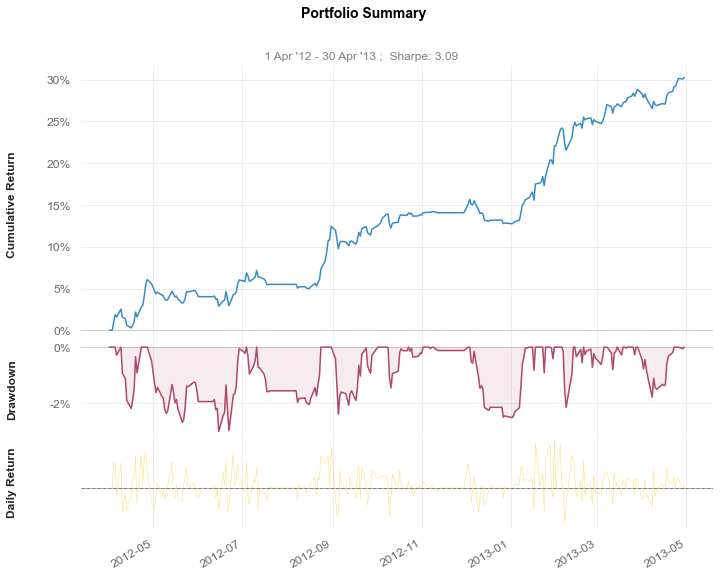

In [332]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

## 함수 만들기

In [42]:
df_test = df_PB[df_PB["거래소코드"]=="023430"]
df_test["BS"] = ""
df_test["보유날_종가"] = 0
df_test["보유날_일별수익률"] = 0
df_test["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
df_test

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_44375/1989552553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["BS"] = ""
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_44375/1989552553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["보유날_종가"] = 0
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_44375/1989552553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA40,MA60,BS,보유날_종가,보유날_일별수익률,첫매수날_여부
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-04-02,684,690,650,674,388590,258935068,-1.46,627.80,718.659290,536.940710,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.000000,1.093781,651.000000,620.884615,30.115385,664.000000,627.80,619.975,595.216667,,0,0,0
2012-04-03,704,704,630,658,363706,235863988,-2.37,627.95,719.008050,536.891950,023430,0.665005,664.000000,0,241500784,3.021671,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,622.425,597.616667,,0,0,0
2012-04-04,638,673,622,654,282173,179832816,-0.61,629.55,721.289850,537.810150,023430,0.633257,649.666667,0,183318392,2.354065,70.185435,71926.450980,-11.942981,659.000000,624.461538,34.538462,672.444444,629.55,624.775,599.816667,,0,0,0
2012-04-05,650,670,623,640,252864,159818568,-2.14,631.75,722.203536,541.296464,023430,0.545604,644.333333,0,162928704,2.335605,70.020432,-69941.106383,20.817186,660.666667,626.038462,34.628205,674.111111,631.75,626.525,601.816667,,0,0,0
2012-04-06,640,660,620,640,270468,170299356,0.00,635.75,719.684498,551.815502,023430,0.525317,640.000000,0,173099520,1.864958,65.095480,0.000000,29.930879,662.416667,627.500000,34.916667,668.888889,635.75,628.475,603.883333,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-04-24,647,650,620,630,16396,10241690,0.32,641.10,672.380732,609.819268,023430,0.322574,633.333333,10384133,0,0.720136,41.865072,-5465.333333,16.667252,630.666667,645.384615,-14.717949,629.888889,641.10,648.550,650.750000,,0,0,0
2013-04-25,630,648,621,631,15182,9597477,0.16,639.40,668.853978,609.946022,023430,0.357405,633.333333,0,9615266,0.525627,34.453188,-3936.074074,12.882580,630.833333,644.076923,-13.243590,630.555556,639.40,648.400,650.016667,,0,0,0
2013-04-26,642,642,620,635,11910,7414301,0.63,638.05,665.552919,610.547081,023430,0.444551,632.333333,0,7531090,0.666373,39.989440,4330.909091,12.273195,630.416667,643.307692,-12.891026,631.444444,638.05,648.225,649.433333,,0,0,0


In [43]:
from datetime import timedelta 
df_tm2 = pd.DataFrame(df_test.iloc[0]).T
df_tm2["날짜"]=(df_test.index[0] - timedelta(days=2))
df_tm2["BS"] = "sell" 
df_tm2.set_index("날짜", inplace=True)
df_tm2

df_tm1 = pd.DataFrame(df_test.iloc[0]).T
df_tm1["날짜"]=(df_test.index[0] - timedelta(days=1))
df_tm1["BS"] = "sell"
df_tm1.set_index("날짜", inplace=True)
df_tm1

df_test = pd.concat([df_tm2, df_tm1, df_test], axis=0)
df_test.reset_index(drop=False, inplace=True)
df_test

,날짜,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA40,MA60,BS,보유날_종가,보유날_일별수익률,첫매수날_여부
0,2012-03-31,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
1,2012-04-01,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
2,2012-04-02,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,,0,0,0
3,2012-04-03,704,704,630,658,363706,235863988,-2.37,627.95,719.00805,536.89195,023430,0.665005,664.0,0,241500784,3.021671,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,622.425,597.616667,,0,0,0
4,2012-04-04,638,673,622,654,282173,179832816,-0.61,629.55,721.28985,537.81015,023430,0.633257,649.666667,0,183318392,2.354065,70.185435,71926.45098,-11.942981,659.0,624.461538,34.538462,672.444444,629.55,624.775,599.816667,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2013-04-24,647,650,620,630,16396,10241690,0.32,641.1,672.380732,609.819268,023430,0.322574,633.333333,10384133,0,0.720136,41.865072,-5465.333333,16.667252,630.666667,645.384615,-14.717949,629.888889,641.1,648.55,650.75,,0,0,0
267,2013-04-25,630,648,621,631,15182,9597477,0.16,639.4,668.853978,609.946022,023430,0.357405,633.333333,0,9615266,0.525627,34.453188,-3936.074074,12.88258,630.833333,644.076923,-13.24359,630.555556,639.4,648.4,650.016667,,0,0,0
268,2013-04-26,642,642,620,635,11910,7414301,0.63,638.05,665.552919,610.547081,023430,0.444551,632.333333,0,7531090,0.666373,39.98944,4330.909091,12.273195,630.416667,643.307692,-12.891026,631.444444,638.05,648.225,649.433333,,0,0,0
269,2013-04-29,625,644,625,633,4014,2558556,-0.31,636.5,661.196047,611.803953,023430,0.429138,634.0,2544876,0,1.347615,57.403577,-633.789474,12.754583,630.666667,642.5,-11.833333,631.0,636.5,647.95,648.583333,,0,0,0


1. BS 컬럼

In [44]:
for i in df_test.index:
    if (i == df_test.index[0])|(i == df_test.index[1]):
        continue
    
    if df_test.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
        if (df_test.loc[i-2, "BS"] == "buy")&(df_test.loc[i-1, "BS"] == "sell")&((df_test.loc[i, "PB"] >= 0.8)&(df_test.loc[i, "MFI10"] >= 80)):
            df_test.loc[i-1, "BS"] = "buy"
            df_test.loc[i, "첫매수날_여부"] = 1
        
        if (df_test.loc[i, "PB"] >= 0.8)&(df_test.loc[i, "MFI10"] >= 80):
            df_test.loc[i, "BS"] = "buy"
        else:
            df_test.loc[i, "BS"] = "sell"
    
    else: # 전날이 "buy"일 때
        if (df_test.loc[i, "PB"] <= 0.5): # 매도사인
            df_test.loc[i, "BS"] = "sell"
        else:
            df_test.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"


In [45]:
df_test

,날짜,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA40,MA60,BS,보유날_종가,보유날_일별수익률,첫매수날_여부
0,2012-03-31,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
1,2012-04-01,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
2,2012-04-02,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
3,2012-04-03,704,704,630,658,363706,235863988,-2.37,627.95,719.00805,536.89195,023430,0.665005,664.0,0,241500784,3.021671,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,622.425,597.616667,sell,0,0,0
4,2012-04-04,638,673,622,654,282173,179832816,-0.61,629.55,721.28985,537.81015,023430,0.633257,649.666667,0,183318392,2.354065,70.185435,71926.45098,-11.942981,659.0,624.461538,34.538462,672.444444,629.55,624.775,599.816667,sell,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2013-04-24,647,650,620,630,16396,10241690,0.32,641.1,672.380732,609.819268,023430,0.322574,633.333333,10384133,0,0.720136,41.865072,-5465.333333,16.667252,630.666667,645.384615,-14.717949,629.888889,641.1,648.55,650.75,sell,0,0,0
267,2013-04-25,630,648,621,631,15182,9597477,0.16,639.4,668.853978,609.946022,023430,0.357405,633.333333,0,9615266,0.525627,34.453188,-3936.074074,12.88258,630.833333,644.076923,-13.24359,630.555556,639.4,648.4,650.016667,sell,0,0,0
268,2013-04-26,642,642,620,635,11910,7414301,0.63,638.05,665.552919,610.547081,023430,0.444551,632.333333,0,7531090,0.666373,39.98944,4330.909091,12.273195,630.416667,643.307692,-12.891026,631.444444,638.05,648.225,649.433333,sell,0,0,0
269,2013-04-29,625,644,625,633,4014,2558556,-0.31,636.5,661.196047,611.803953,023430,0.429138,634.0,2544876,0,1.347615,57.403577,-633.789474,12.754583,630.666667,642.5,-11.833333,631.0,636.5,647.95,648.583333,sell,0,0,0


2. 보유날 종가 컬럼 생성

In [46]:
for i in df_test.index:
    if df_test.loc[i, "BS"] == "buy":
        df_test.loc[i, "보유날_종가"] = df_test.loc[i, "close"]

In [47]:
df_test

,날짜,시가,high,low,close,volume,거래대금,등락률,center,ub,lb,거래소코드,PB,TP,PMF,NMF,MFR,MFI10,II,IIP21,MACD_short,MACD_long,MACD,MA9,MA20,MA40,MA60,BS,보유날_종가,보유날_일별수익률,첫매수날_여부
0,2012-03-31,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
1,2012-04-01,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
2,2012-04-02,684,690,650,674,388590,258935068,-1.46,627.8,718.65929,536.94071,023430,0.754239,671.333333,0,260873420,4.957108,83.213332,77718.0,1.093781,651.0,620.884615,30.115385,664.0,627.8,619.975,595.216667,sell,0,0,0
3,2012-04-03,704,704,630,658,363706,235863988,-2.37,627.95,719.00805,536.89195,023430,0.665005,664.0,0,241500784,3.021671,75.134713,-88469.027027,1.740109,655.916667,622.153846,33.762821,668.333333,627.95,622.425,597.616667,sell,0,0,0
4,2012-04-04,638,673,622,654,282173,179832816,-0.61,629.55,721.28985,537.81015,023430,0.633257,649.666667,0,183318392,2.354065,70.185435,71926.45098,-11.942981,659.0,624.461538,34.538462,672.444444,629.55,624.775,599.816667,sell,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2013-04-24,647,650,620,630,16396,10241690,0.32,641.1,672.380732,609.819268,023430,0.322574,633.333333,10384133,0,0.720136,41.865072,-5465.333333,16.667252,630.666667,645.384615,-14.717949,629.888889,641.1,648.55,650.75,sell,0,0,0
267,2013-04-25,630,648,621,631,15182,9597477,0.16,639.4,668.853978,609.946022,023430,0.357405,633.333333,0,9615266,0.525627,34.453188,-3936.074074,12.88258,630.833333,644.076923,-13.24359,630.555556,639.4,648.4,650.016667,sell,0,0,0
268,2013-04-26,642,642,620,635,11910,7414301,0.63,638.05,665.552919,610.547081,023430,0.444551,632.333333,0,7531090,0.666373,39.98944,4330.909091,12.273195,630.416667,643.307692,-12.891026,631.444444,638.05,648.225,649.433333,sell,0,0,0
269,2013-04-29,625,644,625,633,4014,2558556,-0.31,636.5,661.196047,611.803953,023430,0.429138,634.0,2544876,0,1.347615,57.403577,-633.789474,12.754583,630.666667,642.5,-11.833333,631.0,636.5,647.95,648.583333,sell,0,0,0


In [48]:
list(df_test["보유날_종가"])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 743,
 699,
 703,
 670,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 677,
 778,
 764,
 783,
 755,
 815,
 837,
 776,
 823,
 810,
 801,
 796,
 799,
 788,
 778,
 791,
 822,
 813,
 791,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 710,
 721,
 695,
 728,
 703,
 704,
 720,
 704,
 719,
 705,
 714,
 715,
 770,
 801,
 753,
 756,
 739,
 725,
 763,
 740,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 700,
 690,
 700,
 688,
 668,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 734,
 724,
 695,
 709,
 685,
 691,
 698,
 700,
 699,
 700,
 700,
 697,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


3. 보유날 일별 수익률 컬럼 생성

In [49]:
df_test["보유날_일별수익률"] = df_test["보유날_종가"].pct_change()
df_test["보유날_일별수익률"] = df_test["보유날_일별수익률"].fillna(0)
for i in df_test.index:
    if df_test.loc[i, "보유날_일별수익률"] == -1.0:
        df_test.loc[i, "보유날_일별수익률"] = 0
    if df_test.loc[i, "보유날_일별수익률"] == np.inf:
        df_test.loc[i, "보유날_일별수익률"] = 0

In [50]:
list(df_test["보유날_일별수익률"])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.05921938088829071,
 0.005722460658083017,
 -0.04694167852062592,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.14918759231905465,
 -0.01799485861182515,
 0.024869109947643908,
 -0.03575989782886335,
 0.07947019867549665,
 0.026993865030674913,
 -0.07287933094384702,
 0.06056701030927836,
 -0.015795868772782495,
 -0.011111111111111072,
 -0.006242197253433224,
 0.0037688442211054607,
 -0.013767209011264048,
 -0.012690355329949221,
 0.016709511568123503,
 0.03919089759797734,
 -0.010948905109489093,
 -0.027060270602705994,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

4. 첫 매수날 일별 수익률을 0으로

In [167]:
for i in df_test.index:
    if (i == df_test.index[0])|(i == df_test.index[1]):
        continue
    
    if (df_test.loc[i-1, "BS"] == "sell")&(df_test.loc[i, "BS"] == "buy"):
        df_test.loc[i, "첫매수날_여부"] = 1

In [168]:
for i in df_test.index:
    if df_test.loc[i, "첫매수날_여부"] == 1:
        df_test.loc[i, "보유날_일별수익률"] = 0

In [188]:
df_test.drop(index=[0,1],inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_stock = df_test.set_index("날짜")["보유날_일별수익률"]
df_stock

날짜
2012-04-02    0.0
2012-04-03    0.0
2012-04-04    0.0
2012-04-05    0.0
2012-04-06    0.0
             ... 
2013-04-24    0.0
2013-04-25    0.0
2013-04-26    0.0
2013-04-29    0.0
2013-04-30    0.0
Name: 보유날_일별수익률, Length: 269, dtype: float64

plot

In [189]:
import quantstats as qs
qs.reports.metrics(df_stock, mode = 'basic')

                    Strategy
------------------  ----------
Start Period        2012-04-02
End Period          2013-04-30
Risk-Free Rate      0.0%
Time in Market      21.0%

Cumulative Return   -0.49%
CAGR﹪              -0.46%

Sharpe              0.11
Prob. Sharpe Ratio  54.71%
Sortino             0.19
Sortino/√2          0.14
Omega               1.04

Max Drawdown        -17.72%
Longest DD Days     216

Gain/Pain Ratio     0.04
Gain/Pain (1M)      0.15

Payoff Ratio        1.13
Profit Factor       1.04
Common Sense Ratio  0.8
CPC Index           0.57
Tail Ratio          0.77
Outlier Win Ratio   20.85
Outlier Loss Ratio  1.96

MTD                 0.0%
3M                  0.0%
6M                  -9.38%
YTD                 -5.04%
1Y                  -0.49%
3Y (ann.)           -0.46%
5Y (ann.)           -0.46%
10Y (ann.)          -0.46%
All-time (ann.)     -0.46%

Avg. Drawdown       -8.08%
Avg. Drawdown Days  69
Recovery Factor     -0.03
Ulcer Index         0.11
Serenity Index      -0.

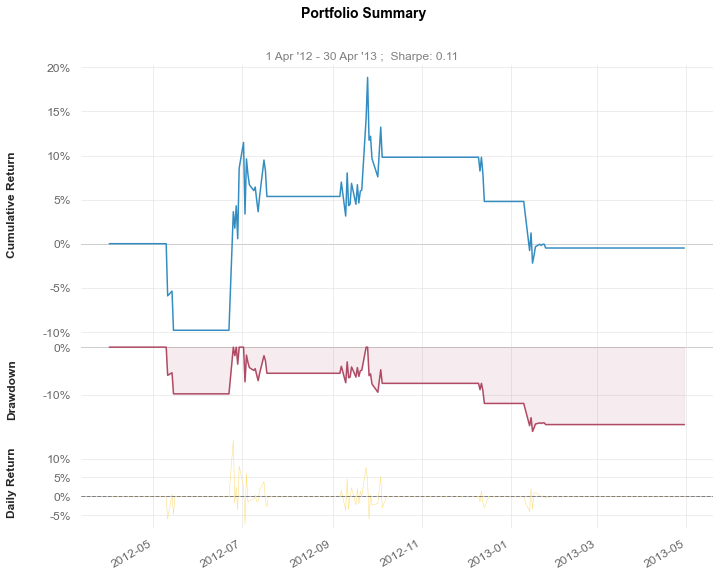

In [190]:
qs.plots.snapshot(df_stock)

---
# 전략3

## 1) 전략3 함수 : 일별수익률로 return

In [333]:
def func_strategy3(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "PB"] <= 0.05)&(df_func.loc[i, "IIP21"] >= 0)):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if ((df_func.loc[i, "PB"] <= 0.05)&(df_func.loc[i, "IIP21"] >= 0)):
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if (df_func.loc[i, "PB"] >= 0.95)&(df_func.loc[i, "IIP21"] <= 0): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock


## 2) 포트폴리오 일별 수익률 계산

In [ ]:
df_port = df_2012.copy()

### 1. 동등비중

In [ ]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = df_acompany["close"].pct_change()
    port_return += df_stock
port_return = port_return/len(list_company_code)

### 2. 수익률 높게

In [ ]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = df_acompany["close"].pct_change()
    port_return += df_stock * dict_weight_max[i] # 리스크가 같을 때 수익률 젤 높게하는 비중으로 가중평균
port_return = port_return/len(list_company_code)

### 3. 리스크 낮게

In [ ]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = df_acompany["close"].pct_change()
    port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2012-04-02
End Period          2013-04-30
Risk-Free Rate      0.0%
Time in Market      90.0%

Cumulative Return   0.81%
CAGR﹪              0.76%

Sharpe              0.16
Prob. Sharpe Ratio  56.52%
Sortino             0.23
Sortino/√2          0.17
Omega               1.03

Max Drawdown        -5.76%
Longest DD Days     202

Gain/Pain Ratio     0.03
Gain/Pain (1M)      0.15

Payoff Ratio        1.08
Profit Factor       1.03
Common Sense Ratio  1.17
CPC Index           0.54
Tail Ratio          1.13
Outlier Win Ratio   3.77
Outlier Loss Ratio  3.6

MTD                 0.63%
3M                  2.61%
6M                  1.55%
YTD                 4.22%
1Y                  0.81%
3Y (ann.)           0.76%
5Y (ann.)           0.76%
10Y (ann.)          0.76%
All-time (ann.)     0.76%

Avg. Drawdown       -3.52%
Avg. Drawdown Days  86
Recovery Factor     0.14
Ulcer Index         0.02
Serenity Index      0.03


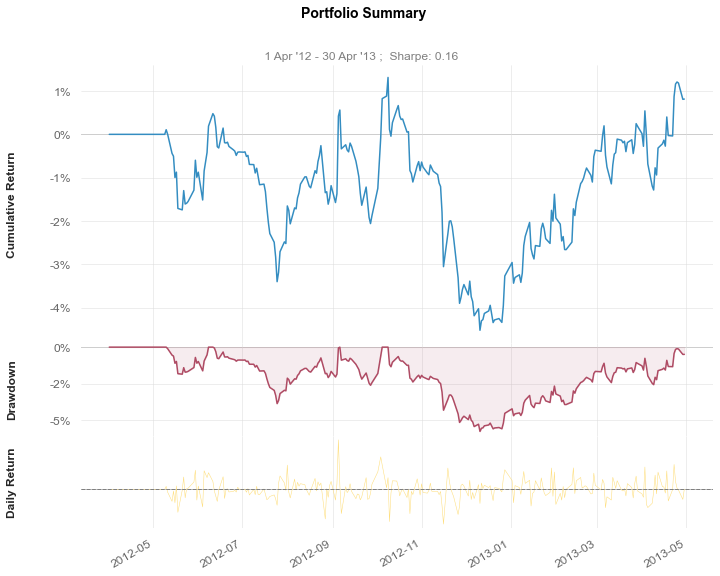

In [336]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

---
# 전략4

## 1) 전략4 함수 : 일별수익률로 return

In [337]:
def func_strategy4(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "MACD"] >= df_func.loc[i, "MACD_signal"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if ((df_func.loc[i, "MACD"] >= df_func.loc[i, "MACD_signal"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])):
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if ((df_func.loc[i, "MACD"] <= df_func.loc[i, "MACD_signal"])&(df_func.loc[i, "close"] <= df_func.loc[i, "MA20"])): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock


## 2) 포트폴리오 일별 수익률 계산

In [338]:
df_port = df_2012.copy()

### 1. 동등비중

In [ ]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = df_acompany["close"].pct_change()
    port_return += df_stock
port_return = port_return/len(list_company_code)

### 2. 수익률 높게

In [ ]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = df_acompany["close"].pct_change()
    port_return += df_stock * dict_weight_max[i] # 리스크가 같을 때 수익률 젤 높게하는 비중으로 가중평균
port_return = port_return/len(list_company_code)

### 3. 리스크 낮게

In [ ]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = df_acompany["close"].pct_change()
    port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

In [ ]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)

---
# 전략5

## 1) 전략5 함수 : 일별수익률로 return

In [341]:
def func_strategy5(df_func):
    
    # 1.컬럼 생성
    df_func["BS"] = ""
    df_func["보유날_종가"] = 0
    df_func["보유날_일별수익률"] = 0
    df_func["첫매수날_여부"] = 0 # 첫매수날의 일별수익율은 0이다. 일별수익률 컬럼만들어준 뒤 이거 사용해서 다시 전처리
    df_func
    
    # 2. BS 컬럼
    ## BS컬럼 생성을 위해 임의의 2개 행 만들기
    df_tm2 = pd.DataFrame(df_func.iloc[0]).T
    df_tm2["날짜"]=(df_func.index[0] - timedelta(days=2))
    df_tm2["BS"] = "sell" 
    df_tm2.set_index("날짜", inplace=True)
    df_tm2

    df_tm1 = pd.DataFrame(df_func.iloc[0]).T
    df_tm1["날짜"]=(df_func.index[0] - timedelta(days=1))
    df_tm1["BS"] = "sell"
    df_tm1.set_index("날짜", inplace=True)
    df_tm1

    df_func = pd.concat([df_tm2, df_tm1, df_func], axis=0)
    df_func.reset_index(drop=False, inplace=True)
    df_func
    
    ## BS컬럼에 buy&sell 넣기
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
    
        if df_func.loc[i-1, "BS"] == "sell": # (전날에 sell이면) buy조건 만족하는지 확인
            if (df_func.loc[i-2, "BS"] == "buy")&(df_func.loc[i-1, "BS"] == "sell")&((df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA9"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA20"])):
                df_func.loc[i-1, "BS"] = "buy"
                df_func.loc[i, "첫매수날_여부"] = 1
            
            if ((df_func.loc[i, "close"] >= df_func.loc[i, "MA60"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA9"])&(df_func.loc[i, "close"] >= df_func.loc[i, "MA20"])): # 매수사인(위 if문에도 넣기)
                df_func.loc[i, "BS"] = "buy"
            else:
                df_func.loc[i, "BS"] = "sell"
        
        else: # (전날이 "buy"일 때) sell조건
            if (df_func.loc[i, "close"] <= df_func.loc[i, "MA40"]): # 매도사인
                df_func.loc[i, "BS"] = "sell"
            else:
                df_func.loc[i, "BS"] = "buy" # sell조건 만족 안하면 "buy"
    
    # 3. "보유날_종가"
    for i in df_func.index:
        if df_func.loc[i, "BS"] == "buy":
            df_func.loc[i, "보유날_종가"] = df_func.loc[i, "close"]
    
    # 4. "보유날_일별수익률" 컬럼
    df_func["보유날_일별수익률"] = df_func["보유날_종가"].pct_change()
    df_func["보유날_일별수익률"] = df_func["보유날_일별수익률"].fillna(0)
    for i in df_func.index:
        if df_func.loc[i, "보유날_일별수익률"] == -1.0:
            df_func.loc[i, "보유날_일별수익률"] = 0
        if df_func.loc[i, "보유날_일별수익률"] == np.inf:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    # 5. "첫매수날_여부" 컬럼
    for i in df_func.index:
        if (i == df_func.index[0])|(i == df_func.index[1]):
            continue
        
        if (df_func.loc[i-1, "BS"] == "sell")&(df_func.loc[i, "BS"] == "buy"):
            df_func.loc[i, "첫매수날_여부"] = 1
    
    for i in df_func.index:
        if df_func.loc[i, "첫매수날_여부"] == 1:
            df_func.loc[i, "보유날_일별수익률"] = 0
    
    df_func.drop(index=[0,1],inplace=True)
    df_func.reset_index(drop=True, inplace=True)
    df_stock = df_func.set_index("날짜")["보유날_일별수익률"]
    
    return df_stock


## 2) 포트폴리오 일별 수익률 계산

In [342]:
df_port = df_2012.copy()

### 1. 동등비중

In [ ]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = df_acompany["close"].pct_change()
    port_return += df_stock
port_return = port_return/len(list_company_code)

### 2. 수익률 높게

In [ ]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = df_acompany["close"].pct_change()
    port_return += df_stock * dict_weight_max[i] # 리스크가 같을 때 수익률 젤 높게하는 비중으로 가중평균
port_return = port_return/len(list_company_code)

### 3. 리스크 낮게

In [ ]:
list_company_code = list(df_port["거래소코드"].unique())

port_return = 0 # 여기다가 각 종목 일별 수익률을 합산 후 (가중)평균
for i in list_company_code:
    df_acompany = df_port[df_port["거래소코드"]==i]
    df_stock = df_acompany["close"].pct_change()
    port_return += df_stock * dict_weight_min[i] # 수익률이 같을 때 리스크를 낮게하는 비중으로 가중평균
port_return = port_return/len(list_company_code)

## 3) 포트폴리오 평가

                    Strategy
------------------  ----------
Start Period        2012-04-02
End Period          2013-04-30
Risk-Free Rate      0.0%
Time in Market      97.0%

Cumulative Return   41.89%
CAGR﹪              38.4%

Sharpe              3.24
Prob. Sharpe Ratio  99.98%
Sortino             5.88
Sortino/√2          4.16
Omega               1.74

Max Drawdown        -5.53%
Longest DD Days     104

Gain/Pain Ratio     0.74
Gain/Pain (1M)      4.23

Payoff Ratio        1.28
Profit Factor       1.74
Common Sense Ratio  2.77
CPC Index           1.28
Tail Ratio          1.59
Outlier Win Ratio   3.22
Outlier Loss Ratio  3.05

MTD                 4.71%
3M                  13.6%
6M                  18.06%
YTD                 20.32%
1Y                  29.19%
3Y (ann.)           38.4%
5Y (ann.)           38.4%
10Y (ann.)          38.4%
All-time (ann.)     38.4%

Avg. Drawdown       -1.28%
Avg. Drawdown Days  14
Recovery Factor     7.57
Ulcer Index         0.02
Serenity Index      3.13


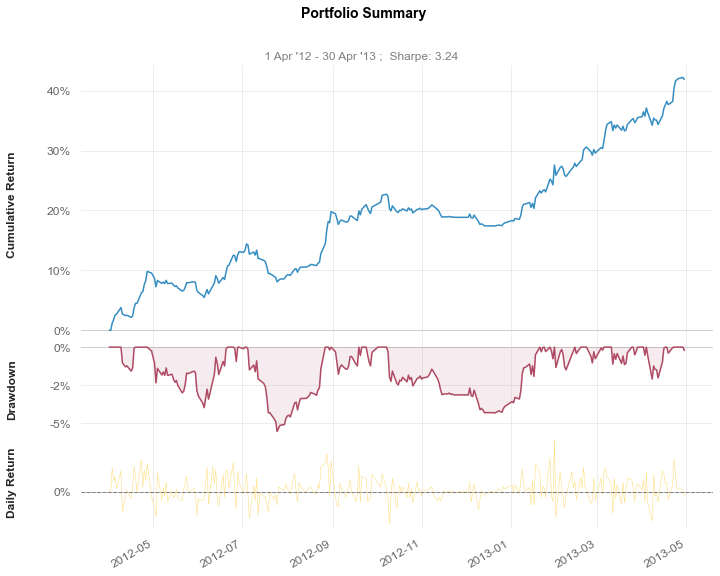

In [344]:
import quantstats as qs
qs.reports.metrics(port_return, mode = 'basic')
qs.plots.snapshot(port_return)